## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
lr = 1e-3
momentum = 0.95
#Large batch size will overfit easily
batch_size = 1024
epochs = 20

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""

patiences = [10, 25]

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}

for patience in patiences :
    early_stopping = keras.callbacks.EarlyStopping(monitor = "val_acc", patience = patience, verbose = 1)
  
    model = build_mlp(x_train.shape[1:], 10)
    optimizer = keras.optimizers.SGD(lr= lr, momentum = momentum)
    model.compile( optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])
  
    history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, shuffle = True, 
                              validation_data = [x_test, y_test], callbacks = [early_stopping])
  
  
    name_tag = "EarlyStopping_" + str(patience)
    results[name_tag] = {
      "train_loss" : history.history['loss'],
      "valid_loss" : history.history['val_loss'],
      "train_acc" : history.history["acc"],
      "valid_acc" :history.history["val_acc"]
    }

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 94us/step - loss: 2.2109 - acc: 0.2721 - val_loss: 2.0781 - val_acc: 0.3200
Epoch 2/20
50000/50000 [==============================] - 4s 71us/step - loss: 1.7398 - acc: 0.3937 - val_loss: 1.7965 - val_acc: 0.3836
Epoch 3/20
50000/50000 [==============================] - 3s 68us/step - loss: 1.6128 - acc: 0.4370 - val_loss: 1.6984 - val_acc: 0.4163
Epoch 4/20
50000/50000 [==============================] - 4s 71us/step - loss: 1.5377 - acc: 0.4593 - val_loss: 1.6364 - val_acc: 0.4256
Epoch 5/20
50000/50000 [==============================] - 3s 69us/step - loss: 1.4807 - acc: 0.4827 - val_loss: 1.5998 - val_acc: 0.4400
Epoch 6/20
50000/50000 [==============================] - 4s 75us/step - loss: 1.4367 - acc: 0.4975 - val_loss: 1.5717 - val_acc: 0.4447
Epoch 7/20
50000/50000 [==============================] - 4s 74us/step - loss: 1.3967 - acc: 0.5128 - val_loss: 1.5556 - val_acc

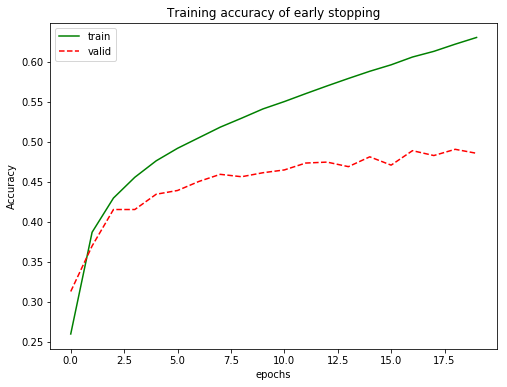

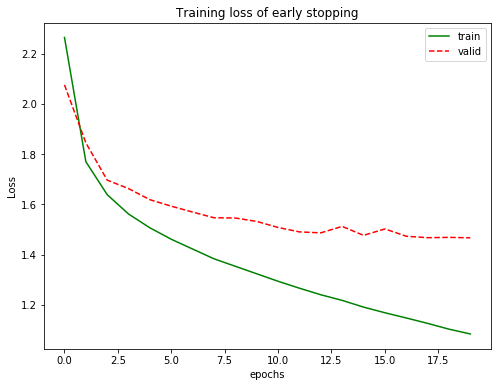

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

plt.figure(figsize = (8,6))
plt.plot(history.history['acc'],'-', label = "train", color = 'g')
plt.plot(history.history['val_acc'],'--', label = 'valid', color = 'r')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title("Training accuracy of early stopping")
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
plt.plot(history.history['loss'],'-', label = "train", color = 'g')
plt.plot(history.history['val_loss'],'--', label = "valid", color = 'r')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title("Training loss of early stopping")
plt.legend()
plt.show()